# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

## load the data sets

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

In [5]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

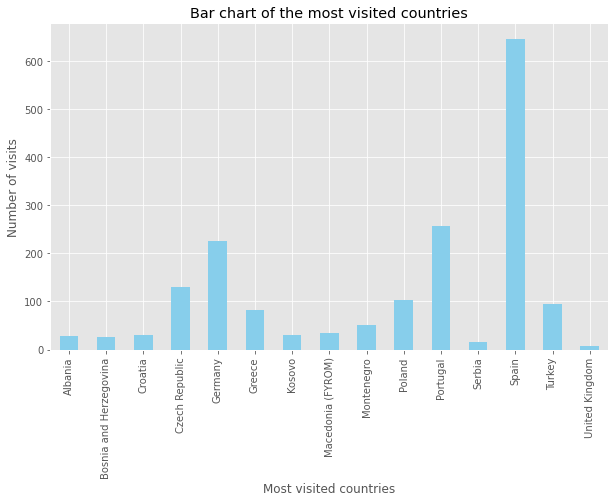

In [143]:
fig, ax = plt.subplots()
plt.style.use('seaborn-bright')
df.groupby("country")["city"].count().plot(kind="bar", color = "skyblue")
ax.set_xlabel("Most visited countries")
ax.set_ylabel("Number of visits")
fig.set_size_inches([10, 6])
plt.title("Bar chart of the most visited countries")
plt.show()

Now you try: re-create the plot above, but make the bars orange with maroon edges.

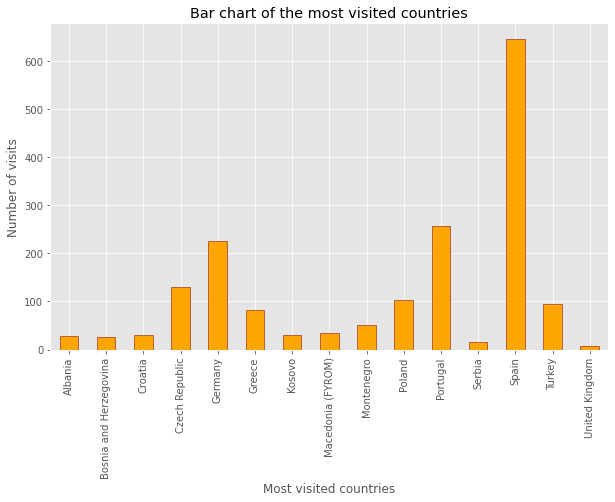

In [142]:
fig, ax = plt.subplots()
plt.style.use('seaborn-bright')
df.groupby("country")["city"].count().plot(kind="bar", color = "orange", edgecolor="maroon", )
ax.set_xlabel("Most visited countries")
ax.set_ylabel("Number of visits")
plt.title("Bar chart of the most visited countries")
fig.set_size_inches([10, 6])

In [7]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries

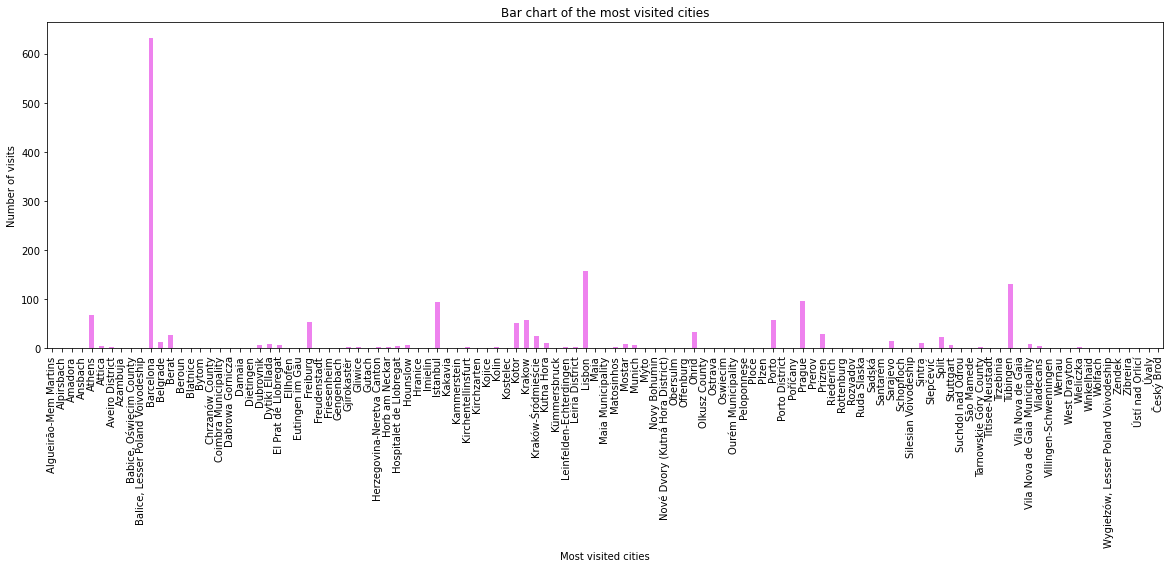

In [136]:
fig, ax = plt.subplots()
df.groupby("city")["country"].count().plot(kind="bar", color = "violet")
ax.set_xlabel("Most visited cities")
ax.set_ylabel("Number of visits")
fig.set_size_inches([20, 6])
plt.title("Bar chart of the most visited cities")
plt.show()

## Next: scatter plots as simple maps

In [8]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 

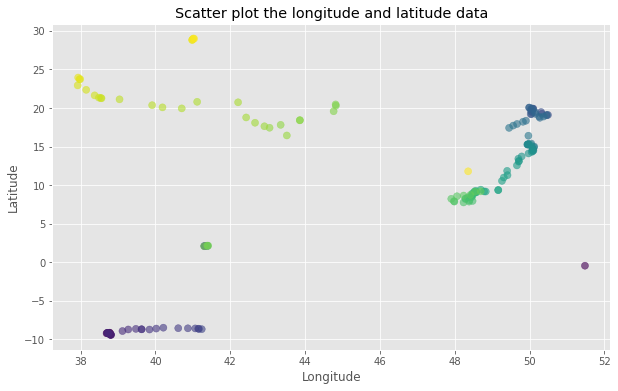

In [146]:
fig, ax = plt.subplots()
plt.style.use('seaborn-bright')
ax.scatter(rs["lat"], rs["lon"], c=rs.index, alpha=0.6, s=50)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
fig.set_size_inches([10, 6])
plt.title("Scatter plot the longitude and latitude data")
plt.show()

## Line charts, with annotation

In [46]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

In [73]:
type(countdata)

pandas.core.series.Series

In [11]:
# Q4: Draw a matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 

In [75]:
countdata.values

array([36, 61, 57, 64, 50, 32, 36, 25, 22, 34, 18, 20, 27, 30, 18, 25, 20,
       30, 42, 40, 29, 32, 31, 35, 32, 33, 41, 45, 31, 32, 28, 23, 31, 54,
       57, 64, 60, 17, 13, 10, 12, 14, 11,  8, 12, 38, 19, 14,  8, 26, 17,
       15, 51, 40, 43, 35, 11])

Text(0.5, 1.0, 'Line chart from countdata')

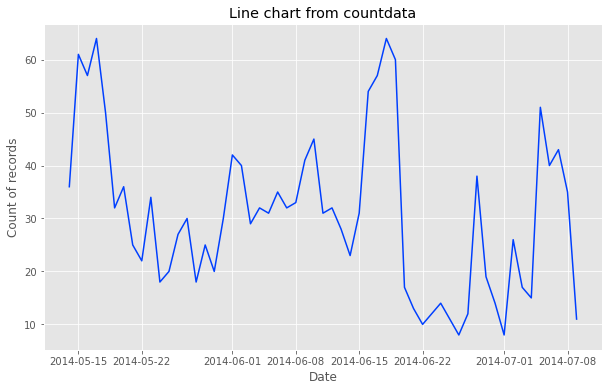

In [147]:
fig, ax = plt.subplots()
plt.style.use('seaborn-bright')
plt.plot(countdata.index, countdata.values)
plt.xlabel("Date")
plt.ylabel("Count of records")
fig.set_size_inches([10, 6])
plt.title("Line chart from countdata")

In [12]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

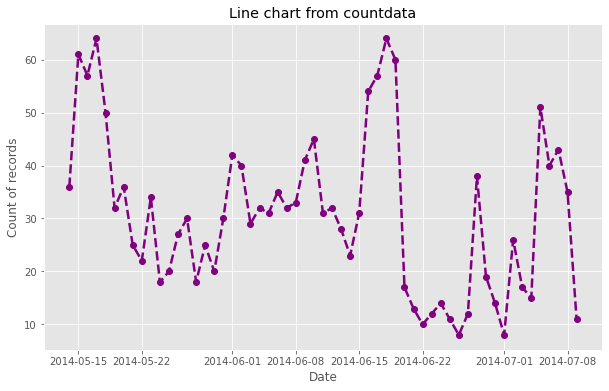

In [155]:
fig, ax = plt.subplots()
plt.style.use('seaborn-bright')
plt.plot(countdata.index, countdata.values, color = "purple", linewidth= 2.5, linestyle="--", marker="o")
plt.xlabel("Date")
plt.ylabel("Count of records")
fig.set_size_inches([10, 6])
plt.title("Line chart from countdata")
plt.show()

## Pie charts

In [50]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

In [14]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 

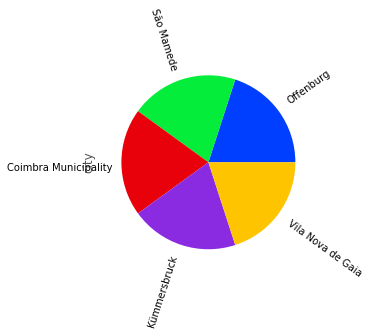

In [149]:
plt.style.use('seaborn-bright')
most_visited_cities = cities.sort_values(ascending=True)[:5]
pie_chart = most_visited_cities.plot.pie(rotatelabels=True)

## Maps

In [1]:
# Q7: Can you draw a map based on the latitude and lognitude of the cities? 

In [125]:
cities

Barcelona                           632
Lisbon                              158
Tübingen                            131
Prague                               97
Istanbul                             94
                                   ... 
Ostrava                               1
Novy Bohumin                          1
Bytom                                 1
Ruda Slaska                           1
Nové Dvory (Kutná Hora District)      1
Name: city, Length: 113, dtype: int64

In [101]:
type(cities)

pandas.core.series.Series

In [103]:
cities.values

array([632, 158, 131,  97,  94,  67,  58,  58,  54,  51,  34,  30,  27,
        26,  23,  15,  14,  12,  12,   9,   9,   9,   6,   6,   6,   6,
         6,   4,   4,   4,   3,   3,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1])

In [108]:
cities.index

Index(['Barcelona', 'Lisbon', 'Tübingen', 'Prague', 'Istanbul', 'Athens',
       'Krakow', 'Porto', 'Freiburg', 'Kotor',
       ...
       'Kojice', 'Ústí nad Orlicí', 'Prerov', 'Hranice', 'Suchdol nad Odrou',
       'Ostrava', 'Novy Bohumin', 'Bytom', 'Ruda Slaska',
       'Nové Dvory (Kutná Hora District)'],
      dtype='object', length=113)

In [ ]:
#Extracting latitude and longitude from cities:
#Question: how do I extract lat and long from one column? I would expect to have two columns, but I have only one. 
# If I had 2 columns I would have extracted lat and long as below,but with one columns, how do I extract lat and long?
#cities["lat"] = [loc[0] for loc in cities.values]
#cities["lng"] = [loc[1] for loc in cities.values]
# Can you please help?